Housing Price Predictor for Carmichael, CA (95608) - Springboard Capstone 2 Project

In [1]:
#import pandas, matplotlib, and numpy

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#load data csv files

# list of csv files to be combined
csv_files = ['Metrolist2000_95608.csv', 'Metrolist2001_95608.csv', 'Metrolist2002_95608.csv', 
             'Metrolist2003_95608.csv', 'Metrolist2004_95608.csv', 'Metrolist2005_95608.csv', 
             'Metrolist2006_95608.csv', 'Metrolist2007_95608.csv', 'Metrolist2008_95608.csv', 
             'Metrolist2009_95608.csv', 'Metrolist2010_95608.csv', 'Metrolist2011_95608.csv', 
             'Metrolist2012_95608.csv', 'Metrolist2013_95608.csv', 'Metrolist2014_95608.csv', 
             'Metrolist2015_95608.csv', 'Metrolist2016_95608.csv', 'Metrolist2017_95608.csv', 
             'Metrolist2018_95608.csv', 'Metrolist2019_95608.csv', 'Metrolist2020_95608.csv', 
             'Metrolist2021_95608.csv', 'Metrolist2022_95608.csv']

# list to hold dataframes
df_list = []

# loop through the list of csv files
for file in csv_files:
    # read the csv file into a dataframe
    df = pd.read_csv(file)
    # append the dataframe to the list
    df_list.append(df)

# concatenate all dataframes in the list into one dataframe
combined_df = pd.concat(df_list)


In [3]:
# explore shape and variables (column headings)

print(combined_df.shape)
combined_df.columns

(16321, 21)


Index(['APN', 'Address - Street Number', 'Address - Street Name',
       'Address - Zip Code', 'Bedrooms', 'Bathrooms', 'MTRO Square Footage',
       'Lot Size - Acres', 'Year Built', 'Property Condition',
       'Remodeled/Updated', 'Remodeled/Updated Desc', 'DOM', 'CDOM',
       'Original Price', 'List Price', 'Close Price', 'On Market Date',
       'Close Date', 'Multiple Offers', 'Number of Offers'],
      dtype='object')

In [4]:
# Explore NA values

combined_df.isnull().sum()

APN                            1
Address - Street Number        0
Address - Street Name          0
Address - Zip Code             0
Bedrooms                       0
Bathrooms                      0
MTRO Square Footage            1
Lot Size - Acres             438
Year Built                   132
Property Condition         10501
Remodeled/Updated           7328
Remodeled/Updated Desc     11648
DOM                            0
CDOM                           0
Original Price                 0
List Price                     0
Close Price                    0
On Market Date              3048
Close Date                     0
Multiple Offers            11475
Number of Offers               0
dtype: int64

The 'property condition', 'remodeled/updated', 'remodeled/updated desc', 'on market date', and 'multiple offers' are newer field options in Metrolist. Unfortunately, we'll need to drop those columns for the timeframe of our model. 

In the future, we might be able to incorporate additional zipcodes (to have enough data) within a timeframe that includes values for property condition and multiple offers. 

In [5]:
# drop columns with excessive NA values

df = combined_df.drop(['Property Condition', 'Remodeled/Updated', 'Remodeled/Updated Desc', 
                       'On Market Date', 'Multiple Offers', 'Number of Offers'], axis = 'columns')
df.shape

(16321, 15)

In [6]:
df.head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date
0,260-0410-019-0000,3929,Cyrus,95608,3,3 (2 1),1480.0,0.10,1992.0,0,336,159000.0,159000.0,157500.0,06/06/00
1,236-0243-003-0000,6248,Saint James,95608,4,3 (3 0),2123.0,0.21,1962.0,0,28,239500.0,239500.0,235000.0,05/08/00
2,272-0241-050-0000,2700,Compton Parc,95608,3,3 (2 1),1614.0,0.11,1993.0,0,192,165000.0,165000.0,165000.0,11/06/00
3,260-0470-016-0000,6000,Amir,95608,3,3 (2 1),1614.0,0.11,1996.0,0,28,159900.0,159900.0,160000.0,04/27/00
4,260-0410-014-0000,3930,Cyrus,95608,3,3 (2 1),1480.0,0.19,1992.0,0,399,159000.0,159000.0,157500.0,07/05/00


In [7]:
df.isnull().sum()

APN                          1
Address - Street Number      0
Address - Street Name        0
Address - Zip Code           0
Bedrooms                     0
Bathrooms                    0
MTRO Square Footage          1
Lot Size - Acres           438
Year Built                 132
DOM                          0
CDOM                         0
Original Price               0
List Price                   0
Close Price                  0
Close Date                   0
dtype: int64

Since the values for 'APN', 'Lot Size - Acres', 'MTRO Square Footage', and 'Year Built' are independent variables, we'll need to drop the rows associated with those NA values.

In [8]:
# dropping NA values

df2 = df.dropna()
df2.shape

(15752, 15)

In [9]:
df2.isnull().sum()

APN                        0
Address - Street Number    0
Address - Street Name      0
Address - Zip Code         0
Bedrooms                   0
Bathrooms                  0
MTRO Square Footage        0
Lot Size - Acres           0
Year Built                 0
DOM                        0
CDOM                       0
Original Price             0
List Price                 0
Close Price                0
Close Date                 0
dtype: int64

In [10]:
# verifying data types

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15752 entries, 0 to 663
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   APN                      15752 non-null  object 
 1   Address - Street Number  15752 non-null  int64  
 2   Address - Street Name    15752 non-null  object 
 3   Address - Zip Code       15752 non-null  int64  
 4   Bedrooms                 15752 non-null  object 
 5   Bathrooms                15752 non-null  object 
 6   MTRO Square Footage      15752 non-null  float64
 7   Lot Size - Acres         15752 non-null  float64
 8   Year Built               15752 non-null  float64
 9   DOM                      15752 non-null  int64  
 10  CDOM                     15752 non-null  int64  
 11  Original Price           15752 non-null  float64
 12  List Price               15752 non-null  float64
 13  Close Price              15752 non-null  float64
 14  Close Date              

In [11]:
# Convert 'Close Date' to 'datetime'

#First make a copy of the dataframe to avoid "Setting With Copy Warning"
df2 = df2.copy()

# First replacing "/" with "-" in 'Close Date' column
df2.loc[:,'Close Date'] = df2.loc[:,'Close Date'].str.replace('/', '-')

df2.loc[:,'Close Date'] = pd.to_datetime(df2.loc[:,'Close Date'],format='%m-%d-%y')

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15752 entries, 0 to 663
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   APN                      15752 non-null  object        
 1   Address - Street Number  15752 non-null  int64         
 2   Address - Street Name    15752 non-null  object        
 3   Address - Zip Code       15752 non-null  int64         
 4   Bedrooms                 15752 non-null  object        
 5   Bathrooms                15752 non-null  object        
 6   MTRO Square Footage      15752 non-null  float64       
 7   Lot Size - Acres         15752 non-null  float64       
 8   Year Built               15752 non-null  float64       
 9   DOM                      15752 non-null  int64         
 10  CDOM                     15752 non-null  int64         
 11  Original Price           15752 non-null  float64       
 12  List Price               15752 non

In [12]:
df2.head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date
0,260-0410-019-0000,3929,Cyrus,95608,3,3 (2 1),1480.0,0.10,1992.0,0,336,159000.0,159000.0,157500.0,2000-06-06
1,236-0243-003-0000,6248,Saint James,95608,4,3 (3 0),2123.0,0.21,1962.0,0,28,239500.0,239500.0,235000.0,2000-05-08
2,272-0241-050-0000,2700,Compton Parc,95608,3,3 (2 1),1614.0,0.11,1993.0,0,192,165000.0,165000.0,165000.0,2000-11-06
3,260-0470-016-0000,6000,Amir,95608,3,3 (2 1),1614.0,0.11,1996.0,0,28,159900.0,159900.0,160000.0,2000-04-27
4,260-0410-014-0000,3930,Cyrus,95608,3,3 (2 1),1480.0,0.19,1992.0,0,399,159000.0,159000.0,157500.0,2000-07-05


In [13]:
df2.describe()

,Address - Street Number,Address - Zip Code,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price
count,15752.000000,15752.0,15752.000000,15752.000000,15752.000000,15752.000000,15752.000000,1.575200e+04,1.575200e+04,1.575200e+04
mean,4636.676168,95608.0,1793.030028,2.411157,1979.215973,31.948578,50.767331,3.997906e+05,3.790142e+05,3.747680e+05
std,1489.189215,0.0,702.309577,157.744109,286.882471,53.865071,77.309014,6.854583e+05,2.364441e+05,2.278672e+05
min,0.000000,95608.0,18.000000,0.000000,1.000000,0.000000,0.000000,5.490000e+02,3.500000e+04,1.850000e+04
25%,3628.000000,95608.0,1339.000000,0.167000,1958.000000,3.000000,7.000000,2.399500e+05,2.350000e+05,2.340000e+05
50%,4917.000000,95608.0,1654.000000,0.230000,1965.000000,11.000000,22.000000,3.450000e+05,3.350000e+05,3.300000e+05
75%,5901.000000,95608.0,2075.000000,0.270000,1978.000000,40.000000,64.000000,4.650000e+05,4.500000e+05,4.500000e+05
max,8949.000000,95608.0,9994.000000,13504.000000,9999.000000,1554.000000,1554.000000,5.745000e+07,4.800000e+06,4.062500e+06


In [14]:
df2['Bedrooms'].nunique()
df2['Bedrooms'].value_counts()

3       8497
4       3998
2       1283
5        618
3-4      610
4-5      304
2-3      157
5-6       69
6         69
1         31
3-5       24
4-6       15
7         12
3-2       11
2-4        8
4-3        8
5-7        6
6-7        5
1-2        5
3-6        3
8          2
0          2
5-4        2
4-13       1
8-10       1
6-4        1
9          1
1-3        1
2-1        1
10         1
8-9        1
8-14       1
6-8        1
7-8        1
5-8        1
11         1
Name: Bedrooms, dtype: int64

We need to remove the characters after "-" which denotes possible range of bedrooms. This simplifies the column making it a count of only the lower range of number of bedrooms. With the hyphen removed, the column can now be assigned int type.

In [15]:
def remove_after_hyphen(bedrooms):
    return bedrooms.split("-")[0]

df2.loc[:,"Bedrooms"] = df2["Bedrooms"].apply(remove_after_hyphen)


In [16]:
df2['Bedrooms'].value_counts()

3     9145
4     4326
2     1449
5      696
6       76
1       37
7       13
8        5
0        2
9        1
10       1
11       1
Name: Bedrooms, dtype: int64

Next we'll remove the outliers from Bedrooms column by limiting the range between 2 - 5 rooms. We might end up limiting it furhter later on, but should be good enough for now.

In [17]:
df2.loc[:,'Bedrooms'] = df2.loc[:,'Bedrooms'].astype(int) 

df2 = df2[df2['Bedrooms'] < 6]
df2 = df2[df2['Bedrooms'] > 1]
df2['Bedrooms'].value_counts()

3    9145
4    4326
2    1449
5     696
Name: Bedrooms, dtype: int64

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15616 entries, 0 to 663
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   APN                      15616 non-null  object        
 1   Address - Street Number  15616 non-null  int64         
 2   Address - Street Name    15616 non-null  object        
 3   Address - Zip Code       15616 non-null  int64         
 4   Bedrooms                 15616 non-null  int64         
 5   Bathrooms                15616 non-null  object        
 6   MTRO Square Footage      15616 non-null  float64       
 7   Lot Size - Acres         15616 non-null  float64       
 8   Year Built               15616 non-null  float64       
 9   DOM                      15616 non-null  int64         
 10  CDOM                     15616 non-null  int64         
 11  Original Price           15616 non-null  float64       
 12  List Price               15616 non

In [19]:
df2['Bathrooms'].nunique()
df2['Bathrooms'].value_counts()

2 (2 0)    7998
3 (2 1)    2917
3 (3 0)    1793
1 (1 0)    1211
2 (1 1)    1030
4 (3 1)     316
4 (4 0)     125
5 (4 1)      89
5 (3 2)      33
4 (2 2)      24
5 (5 0)      21
6 (4 2)      18
6 (5 1)      14
3 (1 2)       6
6 (6 0)       5
7 (5 2)       4
7 (2 5)       3
1 (0 1)       3
8 (3 5)       1
6 (3 3)       1
0 (0 0)       1
5 (2 3)       1
8 (5 3)       1
2 (0 2)       1
Name: Bathrooms, dtype: int64

We'll now focus on the Bathrooms column. We want to Drop the characters inside "()" which denotes full and half baths. This simplifies the column entries making them a count of total number of bathrooms. With the "()" removed, the column can now be assigned int type.

In [20]:
df2.loc[:,'Bathrooms'] = df2['Bathrooms'].str.replace(r'\((.*)\)', '')
df2.loc[:,'Bathrooms'] = df2.loc[:,'Bathrooms'].astype(int)

/var/folders/kq/2rrl3tt57dq4y1s6lx11llf40000gn/T/ipykernel_92655/4183579862.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df2.loc[:,'Bathrooms'] = df2['Bathrooms'].str.replace(r'\((.*)\)', '')


In [21]:
df2['Bathrooms'].value_counts()

2    9029
3    4716
1    1214
4     465
5     144
6      38
7       7
8       2
0       1
Name: Bathrooms, dtype: int64

In [22]:
df2 = df2[df2['Bathrooms'] < 6]
df2 = df2[df2['Bathrooms'] > 0]
df2['Bathrooms'].value_counts()

2    9029
3    4716
1    1214
4     465
5     144
Name: Bathrooms, dtype: int64

We've limited the range of total bathrooms to between 1 and 5. Let's examine our summary stats to see if anything jumps out at us.

In [23]:
#View summary statistics

df2.describe()


,Address - Street Number,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price
count,15568.000000,15568.0,15568.000000,15568.000000,15568.000000,15568.000000,15568.000000,15568.000000,15568.000000,1.556800e+04,1.556800e+04,1.556800e+04
mean,4637.285393,95608.0,3.269399,2.312436,1773.689748,2.432365,1978.217176,31.647161,50.327659,3.942661e+05,3.736125e+05,3.697852e+05
std,1485.941911,0.0,0.684142,0.697172,650.267598,158.673484,273.868252,51.840485,75.631903,6.819153e+05,2.175018e+05,2.113155e+05
min,0.000000,95608.0,2.000000,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,5.490000e+02,3.500000e+04,1.850000e+04
25%,3631.000000,95608.0,3.000000,2.000000,1339.000000,0.165375,1958.000000,3.000000,7.000000,2.399000e+05,2.350000e+05,2.330000e+05
50%,4917.000000,95608.0,3.000000,2.000000,1649.000000,0.230000,1965.000000,11.000000,22.000000,3.405000e+05,3.349500e+05,3.300000e+05
75%,5901.000000,95608.0,4.000000,3.000000,2064.250000,0.270000,1978.000000,39.000000,64.000000,4.599000e+05,4.499500e+05,4.500000e+05
max,8949.000000,95608.0,5.000000,5.000000,7714.000000,13504.000000,9999.000000,849.000000,1357.000000,5.745000e+07,2.995000e+06,2.750000e+06


In [24]:
# Something isn't right with price columns
df2.head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date
0,260-0410-019-0000,3929,Cyrus,95608,3,3,1480.0,0.10,1992.0,0,336,159000.0,159000.0,157500.0,2000-06-06
1,236-0243-003-0000,6248,Saint James,95608,4,3,2123.0,0.21,1962.0,0,28,239500.0,239500.0,235000.0,2000-05-08
2,272-0241-050-0000,2700,Compton Parc,95608,3,3,1614.0,0.11,1993.0,0,192,165000.0,165000.0,165000.0,2000-11-06
3,260-0470-016-0000,6000,Amir,95608,3,3,1614.0,0.11,1996.0,0,28,159900.0,159900.0,160000.0,2000-04-27
4,260-0410-014-0000,3930,Cyrus,95608,3,3,1480.0,0.19,1992.0,0,399,159000.0,159000.0,157500.0,2000-07-05


Something isn't right with our price column. We need to remove extra "0" after "." in Price, Year Built and Square Footage columns.

In [25]:

df2.loc[:,'Original Price'] = df2.loc[:,'Original Price'].astype(str)
df2.loc[:,'List Price'] = df2.loc[:,'List Price'].astype(str)
df2.loc[:,'Close Price'] = df2.loc[:,'Close Price'].astype(str)
df2.loc[:,'Year Built'] = df2.loc[:,'Year Built'].astype(str)
df2.loc[:,'MTRO Square Footage'] = df2.loc[:,'MTRO Square Footage'].astype(str)

def remove_zero_after_dot(original_price):
    return original_price.split(".")[0]

df2.loc[:,"Original Price"] = df2["Original Price"].apply(remove_zero_after_dot)
df2.loc[:,"List Price"] = df2["List Price"].apply(remove_zero_after_dot)
df2.loc[:,"Close Price"] = df2["Close Price"].apply(remove_zero_after_dot)
df2.loc[:,"Year Built"] = df2["Year Built"].apply(remove_zero_after_dot)
df2.loc[:,"MTRO Square Footage"] = df2["MTRO Square Footage"].apply(remove_zero_after_dot)

df2.loc[:,'Original Price'] = df2.loc[:,'Original Price'].astype(int)
df2.loc[:,'List Price'] = df2.loc[:,'List Price'].astype(int)
df2.loc[:,'Close Price'] = df2.loc[:,'Close Price'].astype(int)
df2.loc[:,'Year Built'] = df2.loc[:,'Year Built'].astype(int)
df2.loc[:,'MTRO Square Footage'] = df2.loc[:,'MTRO Square Footage'].astype(int)


df2.head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date
0,260-0410-019-0000,3929,Cyrus,95608,3,3,1480,0.10,1992,0,336,159000,159000,157500,2000-06-06
1,236-0243-003-0000,6248,Saint James,95608,4,3,2123,0.21,1962,0,28,239500,239500,235000,2000-05-08
2,272-0241-050-0000,2700,Compton Parc,95608,3,3,1614,0.11,1993,0,192,165000,165000,165000,2000-11-06
3,260-0470-016-0000,6000,Amir,95608,3,3,1614,0.11,1996,0,28,159900,159900,160000,2000-04-27
4,260-0410-014-0000,3930,Cyrus,95608,3,3,1480,0.19,1992,0,399,159000,159000,157500,2000-07-05


In [26]:
df2.describe()

,Address - Street Number,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price
count,15568.000000,15568.0,15568.000000,15568.000000,15568.000000,15568.000000,15568.000000,15568.000000,15568.000000,1.556800e+04,1.556800e+04,1.556800e+04
mean,4637.285393,95608.0,3.269399,2.312436,1773.689748,2.432365,1978.217176,31.647161,50.327659,3.942661e+05,3.736125e+05,3.697852e+05
std,1485.941911,0.0,0.684142,0.697172,650.267598,158.673484,273.868252,51.840485,75.631903,6.819153e+05,2.175018e+05,2.113155e+05
min,0.000000,95608.0,2.000000,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,5.490000e+02,3.500000e+04,1.850000e+04
25%,3631.000000,95608.0,3.000000,2.000000,1339.000000,0.165375,1958.000000,3.000000,7.000000,2.399000e+05,2.350000e+05,2.330000e+05
50%,4917.000000,95608.0,3.000000,2.000000,1649.000000,0.230000,1965.000000,11.000000,22.000000,3.405000e+05,3.349500e+05,3.300000e+05
75%,5901.000000,95608.0,4.000000,3.000000,2064.250000,0.270000,1978.000000,39.000000,64.000000,4.599000e+05,4.499500e+05,4.500000e+05
max,8949.000000,95608.0,5.000000,5.000000,7714.000000,13504.000000,9999.000000,849.000000,1357.000000,5.745000e+07,2.995000e+06,2.750000e+06


Let's now convert our Address columns to strings and Zip Code to category type.

In [27]:

df2.loc[:,'Address - Street Number'] = df2.loc[:,'Address - Street Number'].astype(str)
df2.loc[:,'Address - Street Name'] = df2.loc[:,'Address - Street Name'].astype(str)
df2.loc[:,'Address - Zip Code'] = df2.loc[:,'Address - Zip Code'].astype('category')

df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15568 entries, 0 to 663
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   APN                      15568 non-null  object        
 1   Address - Street Number  15568 non-null  object        
 2   Address - Street Name    15568 non-null  object        
 3   Address - Zip Code       15568 non-null  category      
 4   Bedrooms                 15568 non-null  int64         
 5   Bathrooms                15568 non-null  int64         
 6   MTRO Square Footage      15568 non-null  int64         
 7   Lot Size - Acres         15568 non-null  float64       
 8   Year Built               15568 non-null  int64         
 9   DOM                      15568 non-null  int64         
 10  CDOM                     15568 non-null  int64         
 11  Original Price           15568 non-null  int64         
 12  List Price               15568 non

In [28]:
df2.describe()

,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price
count,15568.000000,15568.000000,15568.000000,15568.000000,15568.000000,15568.000000,15568.000000,1.556800e+04,1.556800e+04,1.556800e+04
mean,3.269399,2.312436,1773.689748,2.432365,1978.217176,31.647161,50.327659,3.942661e+05,3.736125e+05,3.697852e+05
std,0.684142,0.697172,650.267598,158.673484,273.868252,51.840485,75.631903,6.819153e+05,2.175018e+05,2.113155e+05
min,2.000000,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,5.490000e+02,3.500000e+04,1.850000e+04
25%,3.000000,2.000000,1339.000000,0.165375,1958.000000,3.000000,7.000000,2.399000e+05,2.350000e+05,2.330000e+05
50%,3.000000,2.000000,1649.000000,0.230000,1965.000000,11.000000,22.000000,3.405000e+05,3.349500e+05,3.300000e+05
75%,4.000000,3.000000,2064.250000,0.270000,1978.000000,39.000000,64.000000,4.599000e+05,4.499500e+05,4.500000e+05
max,5.000000,5.000000,7714.000000,13504.000000,9999.000000,849.000000,1357.000000,5.745000e+07,2.995000e+06,2.750000e+06


It feels like rounding the stats to two decimal places would be helpful. This way we'll be able to better compare the data with normal real estate data.

In [29]:
#Rounding summary statistics 
summary = df2.describe()
summary = np.round(summary, 2)
print(summary)

       Bedrooms  Bathrooms  MTRO Square Footage  Lot Size - Acres  Year Built  \
count  15568.00   15568.00             15568.00          15568.00    15568.00   
mean       3.27       2.31              1773.69              2.43     1978.22   
std        0.68       0.70               650.27            158.67      273.87   
min        2.00       1.00                18.00              0.00        1.00   
25%        3.00       2.00              1339.00              0.17     1958.00   
50%        3.00       2.00              1649.00              0.23     1965.00   
75%        4.00       3.00              2064.25              0.27     1978.00   
max        5.00       5.00              7714.00          13504.00     9999.00   

            DOM      CDOM  Original Price  List Price  Close Price  
count  15568.00  15568.00        15568.00    15568.00     15568.00  
mean      31.65     50.33       394266.07   373612.49    369785.20  
std       51.84     75.63       681915.25   217501.78    211315

Looking at Lot Size, it seems like removing outliers would be a good idea. At this point, we'll limit the data to the IQR, but we might end up adjusting that later. I have personally industry knowlege of the data and feel like we could safely increase the upper limit to .50 acres. So we'll keep this in mind as we move forward.

In [30]:
# Removing outliers from Lot Size - Acres using interquartile range (IQR)

df2 = df2[df2['Lot Size - Acres'] >= .17]
df2 = df2[df2['Lot Size - Acres'] <= .27]
summary = df2.describe()
summary = np.round(summary, 2)
print(summary)


       Bedrooms  Bathrooms  MTRO Square Footage  Lot Size - Acres  Year Built  \
count   7905.00    7905.00              7905.00           7905.00     7905.00   
mean       3.34       2.23              1732.51              0.22     1971.22   
std        0.59       0.60               506.55              0.03      181.16   
min        2.00       1.00               600.00              0.17     1920.00   
25%        3.00       2.00              1388.00              0.20     1958.00   
50%        3.00       2.00              1687.00              0.23     1962.00   
75%        4.00       3.00              2012.00              0.24     1973.00   
max        5.00       5.00              5685.00              0.27     9999.00   

           DOM     CDOM  Original Price  List Price  Close Price  
count  7905.00  7905.00         7905.00     7905.00      7905.00  
mean     29.61    46.76       373586.91   360724.44    358525.30  
std      46.70    67.91       431175.29   150870.96    151236.98  
mi

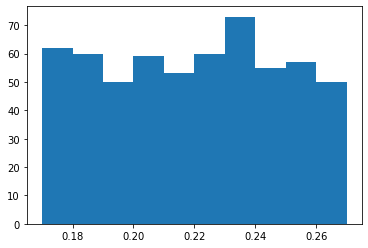

In [31]:
lot_size = df2['Lot Size - Acres'].unique()

plt.hist(lot_size)
plt.show()


It's time to incorporate prime interest rates into our model. The daily prime interest rate can be downloaded from the Federal Reserve Bank of St. Louis https://fred.stlouisfed.org/series/DPRIME 

It's a simple data set that we can clean up by applying datetime type to Date column and float to Dprime columns. Once the Date column is formatted correctly we can merge it with our dataframe.

In [32]:
# load daily prime rates csv file

prime_df = pd.read_csv('DPRIME.csv')
prime_df.shape

(6027, 2)

In [33]:
prime_df.head()

,DATE,DPRIME
0,2000-01-03,8.50
1,2000-01-04,8.50
2,2000-01-05,8.50
3,2000-01-06,8.50
4,2000-01-07,8.50


In [34]:
prime_df.isnull().sum()

DATE      0
DPRIME    0
dtype: int64

In [35]:
prime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    6027 non-null   object
 1   DPRIME  6027 non-null   object
dtypes: object(2)
memory usage: 94.3+ KB


In [36]:
# Convert Date to datetime type

prime_df.loc[:,'DATE'] = pd.to_datetime(prime_df.loc[:,'DATE'],format='%Y-%m-%d')

prime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    6027 non-null   datetime64[ns]
 1   DPRIME  6027 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 94.3+ KB


In [37]:
prime_df.head()

,DATE,DPRIME
0,2000-01-03,8.50
1,2000-01-04,8.50
2,2000-01-05,8.50
3,2000-01-06,8.50
4,2000-01-07,8.50


In [38]:
df2.head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date
1,236-0243-003-0000,6248,Saint James,95608,4,3,2123,0.21,1962,0,28,239500,239500,235000,2000-05-08
4,260-0410-014-0000,3930,Cyrus,95608,3,3,1480,0.19,1992,0,399,159000,159000,157500,2000-07-05
7,247-0293-006-0000,4606,Las Lindas,95608,4,2,2114,0.18,1970,0,7,205000,205000,205000,2000-02-24
10,271-0211-013-0000,2736,Mission,95608,3,2,1900,0.25,1964,0,27,204500,204500,204500,2000-03-30
12,283-0083-001-0000,2348,Calumet,95608,3,2,1535,0.23,1958,0,30,189900,189900,187500,2000-11-20


In [39]:
# Renaming Close Date to match DATE in prime_df
df2 = df2.rename(columns={'Close Date': 'DATE'}) 
df2.head()


,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,DATE
1,236-0243-003-0000,6248,Saint James,95608,4,3,2123,0.21,1962,0,28,239500,239500,235000,2000-05-08
4,260-0410-014-0000,3930,Cyrus,95608,3,3,1480,0.19,1992,0,399,159000,159000,157500,2000-07-05
7,247-0293-006-0000,4606,Las Lindas,95608,4,2,2114,0.18,1970,0,7,205000,205000,205000,2000-02-24
10,271-0211-013-0000,2736,Mission,95608,3,2,1900,0.25,1964,0,27,204500,204500,204500,2000-03-30
12,283-0083-001-0000,2348,Calumet,95608,3,2,1535,0.23,1958,0,30,189900,189900,187500,2000-11-20


In [40]:
# Merging prime_df with df2 on Date column to add DPrime column.

merged_df = pd.merge(df2, prime_df, on='DATE')
merged_df.head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,DATE,DPRIME
0,236-0243-003-0000,6248,Saint James,95608,4,3,2123,0.21,1962,0,28,239500,239500,235000,2000-05-08,9.00
1,292-0500-070-0000,1057,Harrington,95608,3,2,1832,0.21,1984,0,10,285000,285000,278000,2000-05-08,9.00
2,260-0410-014-0000,3930,Cyrus,95608,3,3,1480,0.19,1992,0,399,159000,159000,157500,2000-07-05,9.50
3,283-0151-025-0000,2124,Gunn (Priv Ln),95608,4,2,1994,0.17,1991,0,80,229000,219900,217000,2000-07-05,9.50
4,273-0112-028-0000,3005,California-priv.Ln,95608,3,2,1451,0.23,1980,0,46,182500,179000,174000,2000-07-05,9.50


In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7866 entries, 0 to 7865
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   APN                      7866 non-null   object        
 1   Address - Street Number  7866 non-null   object        
 2   Address - Street Name    7866 non-null   object        
 3   Address - Zip Code       7866 non-null   category      
 4   Bedrooms                 7866 non-null   int64         
 5   Bathrooms                7866 non-null   int64         
 6   MTRO Square Footage      7866 non-null   int64         
 7   Lot Size - Acres         7866 non-null   float64       
 8   Year Built               7866 non-null   int64         
 9   DOM                      7866 non-null   int64         
 10  CDOM                     7866 non-null   int64         
 11  Original Price           7866 non-null   int64         
 12  List Price               7866 non-

In [42]:
merged_df['DPRIME'].value_counts()

3.25    3216
4.75     580
4.00     523
3.50     460
4.25     452
5.00     354
5.50     350
8.25     289
9.50     242
5.25     216
4.50     149
6.00     124
7.50     118
7.00      98
6.75      98
8.00      82
6.25      78
9.00      77
3.75      73
6.50      60
7.25      47
7.75      45
5.75      44
8.50      42
8.75      38
.         11
Name: DPRIME, dtype: int64

In [43]:
# Removing "." values from DPRIME column and assign float type to DPRIME column.

merged_df = merged_df[merged_df['DPRIME'] != "."]
merged_df['DPRIME'] = merged_df['DPRIME'].astype(float)

# Renaming DATE to Close Date
merged_df = merged_df.rename(columns={'DATE': 'Close Date'}) 
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855 entries, 0 to 7865
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   APN                      7855 non-null   object        
 1   Address - Street Number  7855 non-null   object        
 2   Address - Street Name    7855 non-null   object        
 3   Address - Zip Code       7855 non-null   category      
 4   Bedrooms                 7855 non-null   int64         
 5   Bathrooms                7855 non-null   int64         
 6   MTRO Square Footage      7855 non-null   int64         
 7   Lot Size - Acres         7855 non-null   float64       
 8   Year Built               7855 non-null   int64         
 9   DOM                      7855 non-null   int64         
 10  CDOM                     7855 non-null   int64         
 11  Original Price           7855 non-null   int64         
 12  List Price               7855 non-

In [44]:
# Exploring dataframe a bit more. Looks good :)
summary = merged_df.describe()
summary = np.round(summary, 2)
print(summary)

       Bedrooms  Bathrooms  MTRO Square Footage  Lot Size - Acres  Year Built  \
count   7855.00    7855.00              7855.00           7855.00     7855.00   
mean       3.34       2.23              1733.00              0.22     1971.24   
std        0.59       0.60               506.21              0.03      181.73   
min        2.00       1.00               600.00              0.17     1920.00   
25%        3.00       2.00              1389.00              0.20     1958.00   
50%        3.00       2.00              1688.00              0.23     1962.00   
75%        4.00       3.00              2012.00              0.24     1973.00   
max        5.00       5.00              5685.00              0.27     9999.00   

           DOM     CDOM  Original Price  List Price  Close Price   DPRIME  
count  7855.00  7855.00         7855.00     7855.00      7855.00  7855.00  
mean     29.62    46.74       373793.97   360907.44    358718.57     4.60  
std      46.73    67.99       432427.28   